In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. How do a read various kinds of files (shapefiles, geopackages, geojsons, locally and from the web).

In [2]:
#Reading the WindPath Shapefile from the Storm Prediciton Center website.
df1 = gpd.read_file('1955-2018-wind-aspath.shp')
df1.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,loss,closs,slat,slon,elat,elon,len,wid,mt,geometry
0,1,1955,2,1,1955-02-01,13:45:00,3,AR,5,1,...,0.0,0.0,34.78,-90.78,34.7801,-90.7799,0,0,None,"LINESTRING (-90.78000 34.78000, -90.77990 34.7..."
1,2,1955,2,5,1955-02-05,08:00:00,3,LA,22,1,...,0.0,0.0,29.98,-90.28,29.9801,-90.2799,0,0,None,"LINESTRING (-90.28000 29.98000, -90.27990 29.9..."
2,3,1955,2,11,1955-02-11,16:00:00,3,VA,51,1,...,0.0,0.0,36.58,-77.18,36.5801,-77.1799,0,0,None,"LINESTRING (-77.18000 36.58000, -77.17990 36.5..."
3,4,1955,3,1,1955-03-01,02:00:00,3,KY,21,1,...,0.0,0.0,38.20,-85.18,38.2001,-85.1799,0,0,None,"LINESTRING (-85.18000 38.20000, -85.17990 38.2..."
4,5,1955,3,1,1955-03-01,02:00:00,3,KY,21,2,...,0.0,0.0,38.38,-85.40,38.3801,-85.3999,0,0,None,"LINESTRING (-85.40000 38.38000, -85.39990 38.3..."


In [3]:
#Reading Virginia County GeoJSON, mostly just geometry, nothing too interesting
df2 = gpd.read_file('VA-51-virginia-counties.geojson')
df2.head()

,id,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,None,51,079,01480129,0500000US51079,51079,Greene,06,404411500,1706090,"POLYGON ((-78.48581 38.42063, -78.45400 38.475..."
1,None,51,685,01498431,0500000US51685,51685,Manassas Park,25,6575876,956,"POLYGON ((-77.45913 38.77195, -77.47504 38.780..."
2,None,51,101,01480138,0500000US51101,51101,King William,06,709504125,30286031,"POLYGON ((-77.34427 37.79025, -77.24001 37.911..."
3,None,51,109,01494707,0500000US51109,51109,Louisa,06,1285413687,37737584,"POLYGON ((-78.20838 38.13285, -78.10235 38.151..."
4,None,51,036,01480109,0500000US51036,51036,Charles City,06,473493984,55490600,"POLYGON ((-77.24885 37.38287, -77.22411 37.380..."


In [4]:
#Reading url file of Loudoun County, VA Subdivisions geojson 
url = 'https://opendata.arcgis.com/datasets/6c2f788dd00144d8a9f8feab40b0b96d_7.geojson'
df3 = gpd.read_file(url)
df3.head()

,OBJECTID,PA_SUBD_NAME,PA_SUBD_SECT,SHAPE_Length,SHAPE_Area,geometry
0,1,102 CORNWALL STREET,,665.710985,24298.973526,"POLYGON ((-77.56548 39.11732, -77.56548 39.117..."
1,2,106 LOUDOUN PROPERTIES,,298.035649,4515.313856,"POLYGON ((-77.56680 39.11500, -77.56681 39.115..."
2,3,201 JOINT VENTURE SUBDIVISION,,543.915959,11781.873716,"POLYGON ((-77.56763 39.11466, -77.56755 39.114..."
3,4,21631 RIDGETOP COMM CONDO,,1683.882991,181296.118767,"POLYGON ((-77.40604 39.02645, -77.40611 39.026..."
4,5,42097 BRADDOCK ROAD,,1522.814918,133461.214021,"POLYGON ((-77.54755 38.91091, -77.54769 38.910..."


In [5]:
#Reading All of VA County Election Demographics 2016-2018 definitions of headers found:https://github.com/mggg-states/VA-shapefiles
df4 = gpd.read_file('VA_precincts.shp')
df4.head()

,precinct,locality,loc_prec,district,G18DHOR,G18DSEN,G18OHOR,G18OSEN,G18RHOR,G18RSEN,...,HDIST_11,HDIST_REM,SENDIST,2mo_vote_p,2mo_vote_1,2mo_vote_2,2mo_vote_3,2mo_vote_4,2mo_vote_5,geometry
0,Glenkirk,Prince William County,Prince William County Glenkirk,Congressional District 1,980.0,1044.0,0.0,32.0,950.0,856.0,...,13,13,13,1.656566,1.656566,1.656566,1.656566,1.656566,1.656566,"POLYGON ((163199.056 308336.365, 163189.724 30..."
1,Buckland Mills,Prince William County,Prince William County Buckland Mills,Congressional District 1,938.0,978.0,0.0,31.0,766.0,701.0,...,13,13,13,2.728972,2.728972,2.728972,2.728972,2.728972,2.728972,"POLYGON ((162078.796 309095.892, 162068.091 30..."
2,Limestone,Prince William County,Prince William County Limestone,Congressional District 1,1471.0,1562.0,0.0,55.0,1232.0,1079.0,...,13,13,13,2.050747,2.050747,2.050747,2.050747,2.050747,2.050747,"POLYGON ((163554.036 308215.804, 163546.179 30..."
3,Mullen,Prince William County,Prince William County Mullen,Congressional District 1,1312.0,1333.0,0.0,40.0,344.0,293.0,...,13,13,13,2.145329,2.145329,2.145329,2.145329,2.145329,2.145329,"POLYGON ((171765.688 311597.152, 171757.655 31..."
4,Sudley,Prince William County,Prince William County Sudley,Congressional District 1,727.0,737.0,0.0,44.0,520.0,467.0,...,13,13,29,1.810122,1.810122,1.810122,1.810122,1.810122,1.810122,"MULTIPOLYGON (((174200.152 312528.358, 174200...."


## 2. How do I calculate a field?

In [6]:
#Calculating the Percentage of Voting Age Population That are 2 Or More Races(2MOREVAP) by dividing the 2 or more races 
#population by the total voting age population and multiplying it by 100 and storing it into the column/variable 2mo_vote_p
df4['2mo_vote_p'] = 100*(df4['2MOREVAP'] / df4['VAP'])
df4.head()

,precinct,locality,loc_prec,district,G18DHOR,G18DSEN,G18OHOR,G18OSEN,G18RHOR,G18RSEN,...,HDIST_11,HDIST_REM,SENDIST,2mo_vote_p,2mo_vote_1,2mo_vote_2,2mo_vote_3,2mo_vote_4,2mo_vote_5,geometry
0,Glenkirk,Prince William County,Prince William County Glenkirk,Congressional District 1,980.0,1044.0,0.0,32.0,950.0,856.0,...,13,13,13,1.656566,1.656566,1.656566,1.656566,1.656566,1.656566,"POLYGON ((163199.056 308336.365, 163189.724 30..."
1,Buckland Mills,Prince William County,Prince William County Buckland Mills,Congressional District 1,938.0,978.0,0.0,31.0,766.0,701.0,...,13,13,13,2.728972,2.728972,2.728972,2.728972,2.728972,2.728972,"POLYGON ((162078.796 309095.892, 162068.091 30..."
2,Limestone,Prince William County,Prince William County Limestone,Congressional District 1,1471.0,1562.0,0.0,55.0,1232.0,1079.0,...,13,13,13,2.050747,2.050747,2.050747,2.050747,2.050747,2.050747,"POLYGON ((163554.036 308215.804, 163546.179 30..."
3,Mullen,Prince William County,Prince William County Mullen,Congressional District 1,1312.0,1333.0,0.0,40.0,344.0,293.0,...,13,13,13,2.145329,2.145329,2.145329,2.145329,2.145329,2.145329,"POLYGON ((171765.688 311597.152, 171757.655 31..."
4,Sudley,Prince William County,Prince William County Sudley,Congressional District 1,727.0,737.0,0.0,44.0,520.0,467.0,...,13,13,29,1.810122,1.810122,1.810122,1.810122,1.810122,1.810122,"MULTIPOLYGON (((174200.152 312528.358, 174200...."


## 3. How do you save the data?

In [7]:
#Storing the new calculated field and rest of the data back into the original file, and read it to make sure it works
df4.to_file('VA_precincts.shp')
df4 = gpd.read_file('VA_precincts.shp')
df4.head()

,precinct,locality,loc_prec,district,G18DHOR,G18DSEN,G18OHOR,G18OSEN,G18RHOR,G18RSEN,...,HDIST_11,HDIST_REM,SENDIST,2mo_vote_p,2mo_vote_1,2mo_vote_2,2mo_vote_3,2mo_vote_4,2mo_vote_5,geometry
0,Glenkirk,Prince William County,Prince William County Glenkirk,Congressional District 1,980.0,1044.0,0.0,32.0,950.0,856.0,...,13,13,13,1.656566,1.656566,1.656566,1.656566,1.656566,1.656566,"POLYGON ((163199.056 308336.365, 163189.724 30..."
1,Buckland Mills,Prince William County,Prince William County Buckland Mills,Congressional District 1,938.0,978.0,0.0,31.0,766.0,701.0,...,13,13,13,2.728972,2.728972,2.728972,2.728972,2.728972,2.728972,"POLYGON ((162078.796 309095.892, 162068.091 30..."
2,Limestone,Prince William County,Prince William County Limestone,Congressional District 1,1471.0,1562.0,0.0,55.0,1232.0,1079.0,...,13,13,13,2.050747,2.050747,2.050747,2.050747,2.050747,2.050747,"POLYGON ((163554.036 308215.804, 163546.179 30..."
3,Mullen,Prince William County,Prince William County Mullen,Congressional District 1,1312.0,1333.0,0.0,40.0,344.0,293.0,...,13,13,13,2.145329,2.145329,2.145329,2.145329,2.145329,2.145329,"POLYGON ((171765.688 311597.152, 171757.655 31..."
4,Sudley,Prince William County,Prince William County Sudley,Congressional District 1,727.0,737.0,0.0,44.0,520.0,467.0,...,13,13,29,1.810122,1.810122,1.810122,1.810122,1.810122,1.810122,"MULTIPOLYGON (((174200.152 312528.358, 174200...."


## 4. How can you export to a CSV? To an Excel file?

In [8]:
#Export VA_precincts to csv file 'VA_prec_cs'
df4.to_csv('VA_prec_cs.csv')
#Export VA_precincts to excel file 'VA_prec_ex'
df4.to_excel('VA_prec_ex.xlsx')

## 5. How do I take a CSV that includes latitude and longitude, and turn it into a GeoDataFrame?

In [9]:
#Towns my family has lived in / gone to college. We are from leesburg, I go to school in Blacksburg, my sister went to 
#school in Williamsburg, and my dad went to school in Denver. My other sister went to Radford and I thought that would 
#too close to blacksburg on the plot below. 
df5 = pd.read_csv('LoudounTown.csv')
df5.head()

,OBJECTID,TOWN,lati,longi
0,1,Leesburg,39.1157,-77.56
1,2,Blacksburg,37.2300,-80.41
2,3,Williamsburg,37.2707,-76.71
3,4,Denver,39.7392,-104.99


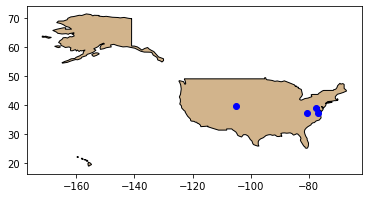

In [10]:
#took the csv of the towns my family has lived in / gone to school in and created it into a geoDataFrame. This was such a pain
#to figure out but once I understood how to do it, it was a lot easier to do. It took the longitude and Latitude from the csv
gdf = gpd.GeoDataFrame(df5, geometry=gpd.points_from_xy(df5.longi, df5.lati))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'United States of America'].plot(color='tan', edgecolor='black')
gdf.plot(ax=ax, color='blue')
plt.show()

## 6. How do I join data with geopandas?

In [11]:
#I had geopandas read the VA Counties geojson file and store it into the variable 'geometry' and add the coulumn add the word
#county at the end of the name so it would be able to add to the other csv file i have below. And then i had it read the first
#name in the file so i could check that it worked
geometry = gpd.read_file('VA-51-virginia-counties.geojson')
geometry['NAME'] = geometry['NAME']+' County'
geometry.head(1)

,id,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,None,51,079,01480129,0500000US51079,51079,Greene County,06,404411500,1706090,"POLYGON ((-78.48581 38.42063, -78.45400 38.475..."


In [12]:
#i had pandas read the VA precincts csv file that we stored/created above. and then had it read the first name to makesure it read
attribute_data = pd.read_csv('VA_prec_cs.csv')
attribute_data.head(1)

,Unnamed: 0,precinct,locality,loc_prec,district,G18DHOR,G18DSEN,G18OHOR,G18OSEN,G18RHOR,...,HDIST_11,HDIST_REM,SENDIST,2mo_vote_p,2mo_vote_1,2mo_vote_2,2mo_vote_3,2mo_vote_4,2mo_vote_5,geometry
0,0,Glenkirk,Prince William County,Prince William County Glenkirk,Congressional District 1,980.0,1044.0,0.0,32.0,950.0,...,13,13,13,1.656566,1.656566,1.656566,1.656566,1.656566,1.656566,"POLYGON ((163199.0560854827 308336.3649517396,..."


In [13]:
#I had the variable geometry merge with the attribute_data to the left of NAME and right of locality and stored it into the 
#variable gf 
gf = geometry.merge(attribute_data,how='left',left_on='NAME',right_on='locality')
gf.head()

,id,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,...,HDIST_11,HDIST_REM,SENDIST,2mo_vote_p,2mo_vote_1,2mo_vote_2,2mo_vote_3,2mo_vote_4,2mo_vote_5,geometry_y
0,None,51,079,01480129,0500000US51079,51079,Greene County,06,404411500,1706090,...,58.0,58.0,24.0,0.220426,0.220426,0.220426,0.220426,0.220426,0.220426,"POLYGON ((87122.86307593531 251475.4084146584,..."
1,None,51,079,01480129,0500000US51079,51079,Greene County,06,404411500,1706090,...,58.0,58.0,24.0,1.085930,1.085930,1.085930,1.085930,1.085930,1.085930,"POLYGON ((90880.84517078577 246113.6865537474,..."
2,None,51,079,01480129,0500000US51079,51079,Greene County,06,404411500,1706090,...,58.0,58.0,24.0,1.155898,1.155898,1.155898,1.155898,1.155898,1.155898,"POLYGON ((96611.53049008547 243827.7325910199,..."
3,None,51,079,01480129,0500000US51079,51079,Greene County,06,404411500,1706090,...,58.0,58.0,24.0,0.995776,0.995776,0.995776,0.995776,0.995776,0.995776,"POLYGON ((98497.86938552251 243242.0357225898,..."
4,None,51,079,01480129,0500000US51079,51079,Greene County,06,404411500,1706090,...,58.0,58.0,24.0,0.740741,0.740741,0.740741,0.740741,0.740741,0.740741,"POLYGON ((89271.108864276 255051.1271723672, 8..."


## 7. How can I create plots of my data (points, lines, and polygons)? 

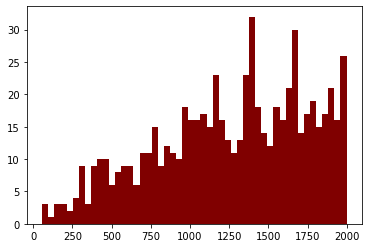

In [14]:
#Created a histogram of df4 of the Total Population that is less than 2000 and the regualr population.
#I named it sos because I was stressing out about doing this project in time haha
sos = plt.hist(df4.loc[df4['TOTPOP'] < 2000,'TOTPOP'],bins=50, color='maroon')

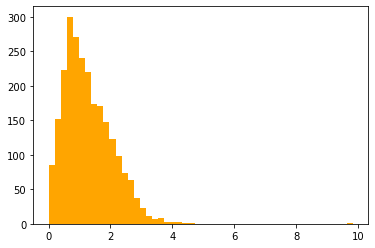

In [15]:
#I created a histogram for the field we created in df4 called the 2mo_vote_p There is an outlier around the 10
see = plt.hist(df4['2mo_vote_p'], bins=50, color='orange')

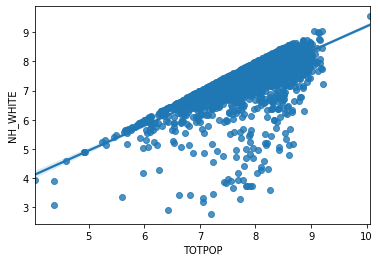

In [16]:
#Created a regression plot of the log of the total population and the log of the not hispanic white population.
#I am not going to lie, I have no idea what i am looking at, but it looks cool haha
popplot = seaborn.regplot(x=np.log(df4['TOTPOP']),y=np.log(df4['NH_WHITE']))

## 8. How do I save those plots to disk?

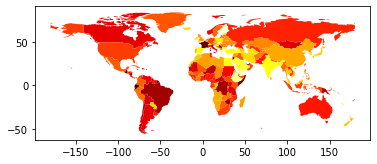

In [17]:
#I created a heatmap to be included in both #7 and #8
#This map creates a new coulmn in the world variable called vap_perc which is the total voting population percent
#which is calculated by dividing the total voting popualtion by the total populaiton and multiplying it by 100 
#I then saved it into the figure called geopandas_vapperc.png
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['vap_perc'] = 100* (df4.VAP / df4.TOTPOP)
world.plot(column='vap_perc',cmap="hot")
plt.savefig('geopandas_vapperc.png',dpi=300,bbox_inches='tight',pad_inches = 0)

## 9. How can I apply a buffer in geopandas?

<ipython-input-18-6394135467fc>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lati = df3.geometry.centroid.x
<ipython-input-18-6394135467fc>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  longi = df3.geometry.centroid.y
C:\Users\grace\anaconda3\envs\analysis_in_gis\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

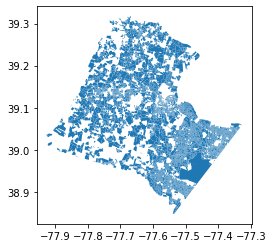

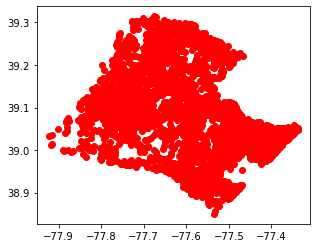

In [18]:
#Okay so this was a hude pain and it stressed me out. I made the lateitude and longitude variables from the centroid from df3
#and then I created a new geodatabase by using df3 and the lati and longi and had the worldd variable read the already uploaded
#map amd only show virginia, and had the geodataframe plot the world of va and the lati and longi before i added the buffer
df3.plot()
lati = df3.geometry.centroid.x
longi = df3.geometry.centroid.y

gdf2 = gpd.GeoDataFrame(df3, geometry=gpd.points_from_xy(lati,longi))
worldd = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = worldd[worldd.name == 'Virginia'].plot(color='blue', edgecolor='black')
gdf2.plot(ax=ax, color='red')
#

<ipython-input-19-4bcc7b3410e0>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df3.centroid.buffer(distance=0.008).plot(cmap="icefire_r")
<ipython-input-19-4bcc7b3410e0>:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df3.centroid.buffer(distance=0.008).plot(cmap="icefire_r")


<AxesSubplot:>

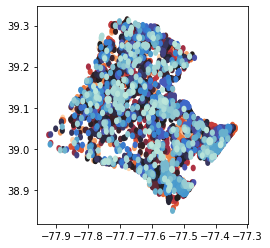

In [19]:
#I added the buffer with a distance of 0.008 to see the dots, and i made it the cool color scheme of icefire its very prettyhaha
#dealing with plotting the centroid points was very difficult and took me a very long time to figure it out 
df3.centroid.buffer(distance=0.008).plot(cmap="icefire_r")

## 10. How can I use both classic Pandas indexing (.loc and .iloc) as well as spatial indexing (.cx) to find data?

In [20]:
#I am looking for the 79th name listed in the df4 dataframe and it is Morrisville Precinct in Fauquier County
df4.iloc[79]

precinct                                            Morrisville
locality                                        Fauquier County
loc_prec                            Fauquier County Morrisville
district                               Congressional District 1
G18DHOR                                                   352.0
                                    ...                        
2mo_vote_2                                             0.656814
2mo_vote_3                                             0.656814
2mo_vote_4                                             0.656814
2mo_vote_5                                             0.656814
geometry      POLYGON ((162847.372768251 269111.9243790333, ...
Name: 79, Length: 63, dtype: object

<AxesSubplot:>

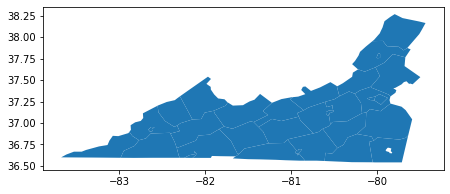

In [21]:
#I made the variable va which is using the cx locater with anything upto -80 coordinatess and then i had it plot it in a figure
#with the size of 10,3, looks pretty cool having va split like that
va = geometry.cx[:-80, :]
va.plot(figsize=(10, 3))

## 11. Can you demonstrate a “group” operation with Pandas syntax? Can you do a spatial “group” using .dissolve?

C:\Users\grace\anaconda3\envs\analysis_in_gis\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

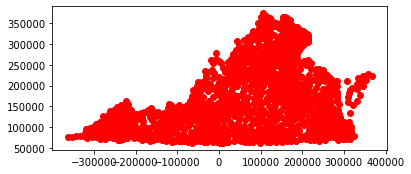

In [22]:
#This was very difficult to figure out. I did the same thing as above for the buffer for this to create a geodataframe for df4
#I wanted to make sure I could plot it properly 
lati = df4.geometry.centroid.x
longi = df4.geometry.centroid.y

gdf3 = gpd.GeoDataFrame(df4, geometry=gpd.points_from_xy(lati,longi))
worlddd = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = worlddd[worlddd.name == 'Virginia'].plot(color='blue', edgecolor='black')
gdf3.plot(ax=ax, color='red')


<AxesSubplot:>

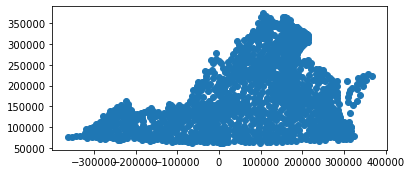

In [23]:
#I made a sub dataframe made up of gdf3 and the attributes below. and then created a new variable called groups to do the 
#dissolve. then i created a new attribute called WVAP_Per which is the white voters population divided by the total voting age
#population mulitplyed by 100. then i plotted it below. 
sub_df = gdf3[['WVAP','VAP','precinct','geometry']]
groups = sub_df.dissolve(by='precinct',aggfunc='sum')
groups['WVAP_Per'] = 100 * groups.WVAP/groups.VAP
groups.head(2)
groups.plot()